**Introduction**:

In this project, the aim is to predict whether the next customer will make a reorder or not for Hunter's E-grocery, a prominent French brand in the e-grocery and lifestyle products industry. By leveraging the power of big data analytics, I will explore customer behavior patterns and develop a predictive model to optimize marketing campaigns and reduce expenses.

**Dataset Description**: 

I will be working with a comprehensive dataset that captures various aspects of customer orders. The dataset includes information such as order IDs, user IDs, order numbers, the day of the week the order was placed, the hour of the day the order was placed, the number of days since the user's previous order, product IDs, the order in which products were added to the cart, department IDs, and more. Most importantly, the dataset provides a binary indicator, the "reordered" column, which tells whether a particular product has been ordered by the user in the past.

**ECommerce_consumer_behaviour.csv dataset** 

https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023


- <span style="font-size: 14px;">**order_id**: numeric - Unique identifier for each order</span>
- <span style="font-size: 14px;">**user_id**: - numeric - Unique identifier for each user who placed an order</span>
- <span style="font-size: 14px;">**order_number**: - numeric - The sequence number for each order placed by the user</span>
- <span style="font-size: 14px;">**order_dow**: - numeric - The day of the week (0-6, where 0 is Sunday) on which the order was placed</span>
- <span style="font-size: 14px;">**order_hour_of_day**: - numeric - The hour of the day (0-23) at which the order was placed</span>
- <span style="font-size: 14px;">**days_since_prior_order**: - numeric - Number of days since the user's previous order</span>
- <span style="font-size: 14px;">**product_id**: - numeric - Unique identifier for each product</span>
- <span style="font-size: 14px;">**add_to_cart_order**: - numeric - The order in which the product was added to the cart</span>
- <span style="font-size: 14px;">**department_id**: - numeric - Unique identifier for each department</span>
- <span style="font-size: 14px;">**department**: - string -  Unique identifier for each department</span>
- <span style="font-size: 14px;">**product_name**: - string - The name of the product</span>
- <span style="font-size: 14px;">**reordered(target)**: - numeric - Binary indicator for whether the product has been ordered by the user in the past</span>

----
**Hypotheses**:

----

1. Hypothesis: The day of the week influences the probability of a customer making a reorder.

- Null hypothesis: The day of the week has no impact on the probability of a customer making a reorder.
- Alternative hypothesis: Certain days of the week have a higher probability of customers making a reorder.

------
2. Hypothesis: The hour of the day influences the probability of a customer making a reorder.

- Null hypothesis: The hour of the day has no impact on the probability of a customer making a reorder.
- Alternative hypothesis: Certain hours of the day have a higher probability of customers making a reorder.

------
3. Hypothesis: The number of days since the user's previous order influences the probability of a customer making a reorder.

- Null hypothesis: The number of days since the previous order has no impact on the probability of a customer making a reorder.
- Alternative hypothesis: Customers who place orders at shorter intervals are more likely to make a reorder.

------
4. Hypothesis: The department of the product influences the probability of a customer making a reorder.

- Null hypothesis: The department of the product has no impact on the probability of a customer making a reorder.
- Alternative hypothesis: Certain departments have a higher probability of customers making a reorder.

------
5. Hypothesis: The order in which the product was added to the cart influences the probability of a customer making a reorder.

- Null hypothesis: The order in which the product was added to the cart has no impact on the probability of a customer making a reorder.
- Alternative hypothesis: Products added to the cart at certain positions have a higher probability of customers making a reorder.

------
6. Hypothesis: The order_number, which represents the sequence number for each order placed by a user, influences the probability of a customer making a reorder.

- Null hypothesis: The order_number has no impact on the probability of a customer making a reorder.
- Alternative hypothesis: The order_number has an impact on the probability of a customer making a reorder, with certain order numbers being associated with higher or lower reorder probabilities.

-----
**Approach Overview**:

To achieve the objective, it is followed a systematic approach that involves several stages. It is started by preparing the data, cleaning, and organizing it for analysis. Next, perform exploratory data analysis (EDA) to gain insights into the dataset and identify any patterns or trends. Once I have a thorough understanding of the data, I will proceed to train and evaluate predictive models using machine learning techniques such as:

- Logistic Regression 
- Random Forest
- Gradient Boosting Classifier 

Additionally, Hypothesis testing by using Chi-square is applied to the features to understand their importance for our dependent column.

The models are trained to predict the probability of customer reorders based on the available features. Finally, the model's performance will be evaluated, and draw meaningful conclusions to guide Hunter's E-grocery in optimizing its marketing campaigns. Following this approach is aimed to provide valuable insights into customer reorder behavior and enable Hunter's E-grocery to make data-driven decisions, enhancing customer satisfaction and driving business growth.

In [0]:
import pyspark
from pyspark.sql import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col
import pyspark.sql.functions as F

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from pyspark.sql.functions import log, isnan, when, count, col, sum, avg, percentile_approx, skewness
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, Normalizer
from pyspark.ml.stat import Correlation, ChiSquareTest
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from sklearn.metrics import roc_curve, auc

from pyspark.ml.fpm import FPGrowth
from pyspark.sql.functions import collect_set
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors

In [0]:
# Create a SparkSession.
spark = SparkSession.builder.appName('big_data_project').getOrCreate() 
# Load the file.  
df = spark.read.csv('dbfs:/FileStore/tables/ECommerce_consumer_behaviour.csv', header=True, inferSchema=True)

In [0]:
# Create a temporary view of the DataFrame.
df.createOrReplaceTempView("big_data")

In [0]:
# Show the top 5 rows.
df.show(5)

+--------+-------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------------+
|order_id|user_id|order_number|order_dow|order_hour_of_day|days_since_prior_order|product_id|add_to_cart_order|reordered|department_id|department|      product_name|
+--------+-------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------------+
| 2425083|  49125|           1|        2|               18|                  null|        17|                1|        0|           13|    pantry|baking ingredients|
| 2425083|  49125|           1|        2|               18|                  null|        91|                2|        0|           16|dairy eggs|   soy lactosefree|
| 2425083|  49125|           1|        2|               18|                  null|        36|                3|        0|           16|dairy eggs|            butter|
| 24

In [0]:
# Show data types of column and number of rows. 
print(f"Number of rows: {df.count()}")
df.printSchema()

Number of rows: 2019501
root
 |-- order_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- order_number: integer (nullable = true)
 |-- order_dow: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- days_since_prior_order: double (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)
 |-- department_id: integer (nullable = true)
 |-- department: string (nullable = true)
 |-- product_name: string (nullable = true)



##### Summary Statistics

In [0]:
df.describe().display()

summary,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
count,2019501,2019501,2019501,2019501,2019501,1895159,2019501,2019501,2019501,2019501,2019501,2019501
mean,1707012.7624452773,103067.26569682313,17.15137749374722,2.7353673011303288,13.439479851705942,11.386034628229083,71.20590432983197,8.363173377978026,0.5897427136703571,9.928348636618649,null,null
stddev,985983.1962344211,59491.16507437712,17.52576499452978,2.0938821276715385,4.241008398868695,8.97097964502835,38.20727466860675,7.150059432956274,0.49188043785873875,6.282933337498951,null,null
min,10,2,1,0,0,0.0,1,1,0,1,alcohol,air fresheners candles
max,3421080,206209,100,6,23,30.0,134,137,1,21,snacks,yogurt


- There are over 2 million orders in this dataset, and the average order number is 17.15. This indicates that there is a significant amount of repeat ordering by users.
- Orders are spread fairly evenly across the days of the week, with a mean value of 2.74 (where 0 is Sunday and 6 is Saturday).
- The most common time for orders to be placed is between 12pm and 2pm, with an average hour of day value of 13.44.
- The average number of days between orders is 11.39, with a standard deviation of 8.97. This indicates that while there is a significant amount of repeat ordering, the frequency of orders varies widely among users.
- Only days_since_prior_order column has null values.

#####Frequency of values

In [0]:
# Loop through each column and print the frequency of values.
for col_name in df.columns:
    freq = df.groupBy(col_name).count().orderBy(col('count').desc())
    print(f"Column {col_name} has the following value frequencies:")
    freq.show(truncate=False)

Column order_id has the following value frequencies:
+--------+-----+
|order_id|count|
+--------+-----+
|790903  |137  |
|2621625 |109  |
|416346  |100  |
|1031566 |95   |
|2409933 |93   |
|1930316 |93   |
|45973   |92   |
|2926893 |92   |
|936852  |87   |
|70299   |83   |
|293169  |77   |
|2869702 |76   |
|3310628 |76   |
|1355077 |74   |
|810928  |74   |
|1220886 |72   |
|2749239 |72   |
|1208941 |71   |
|1929507 |71   |
|28332   |71   |
+--------+-----+
only showing top 20 rows

Column user_id has the following value frequencies:
+-------+-----+
|user_id|count|
+-------+-----+
|176478 |460  |
|129928 |405  |
|126305 |384  |
|201268 |347  |
|115495 |283  |
|100330 |271  |
|31903  |270  |
|15503  |258  |
|105213 |245  |
|203166 |240  |
|193539 |238  |
|17738  |236  |
|60694  |232  |
|97816  |227  |
|175294 |223  |
|96305  |213  |
|11375  |213  |
|180203 |212  |
|33731  |212  |
|167069 |210  |
+-------+-----+
only showing top 20 rows

Column order_number has the following value frequen

#####Data Cleaning

In [0]:
# Group by all columns and count the number of rows
duplicate_count = df.groupBy(df.columns).agg(count("*").alias("count")).filter(col("count") > 1)
 
# Show the duplicate count
duplicate_count.count()

Out[8]: 0

In [0]:
# Count NaN values for each column
null_counts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])

# Display the result
null_counts.show()

+--------+-------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------+
|order_id|user_id|order_number|order_dow|order_hour_of_day|days_since_prior_order|product_id|add_to_cart_order|reordered|department_id|department|product_name|
+--------+-------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------+
|       0|      0|           0|        0|                0|                124342|         0|                0|        0|            0|         0|           0|
+--------+-------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------+



I have discovered that the days_since_prior_order column has missing values meaning that there are 124342 new customers that don't have any prior order data in days_since_prior_order column since they are new customers.

#####Imputing missing values

I have preffered replacing missing values in day_since_prior_order column with '-1' so that they will not interact with our existing data.

In [0]:
df = df.withColumn("days_since_prior_order", when(df["days_since_prior_order"].isNull(), "-1").otherwise(df["days_since_prior_order"]))

In [0]:
# Convert the "days_since_prior_order" column to a numeric data type
df = df.withColumn("days_since_prior_order", col("days_since_prior_order").cast("integer"))
df.filter(col('days_since_prior_order') == '-1').count()

Out[10]: 124342

There are some values named 'missing' in the department column. Whereas the department column is missing, product_name is also missing and department_id equals 21. I preferred dropping them because they don't give valuable information for our predictive models.

In [0]:
df.filter(col('department') == 'missing').show(5) 

# Drop missing values. 
df = df.filter(col('department') != 'missing').dropna(subset=["department"])
df.filter(col('department') == 'missing').count()

+--------+-------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------+
|order_id|user_id|order_number|order_dow|order_hour_of_day|days_since_prior_order|product_id|add_to_cart_order|reordered|department_id|department|product_name|
+--------+-------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------+
|  887348| 109205|          13|        1|                8|                    28|       100|                1|        1|           21|   missing|     missing|
| 1750132|  57626|          13|        0|               10|                    12|       100|                1|        1|           21|   missing|     missing|
| 1218457| 160124|          13|        0|               13|                    20|       100|               25|        1|           21|   missing|     missing|
| 3152951|  67226|          50|        1

#####Outliers

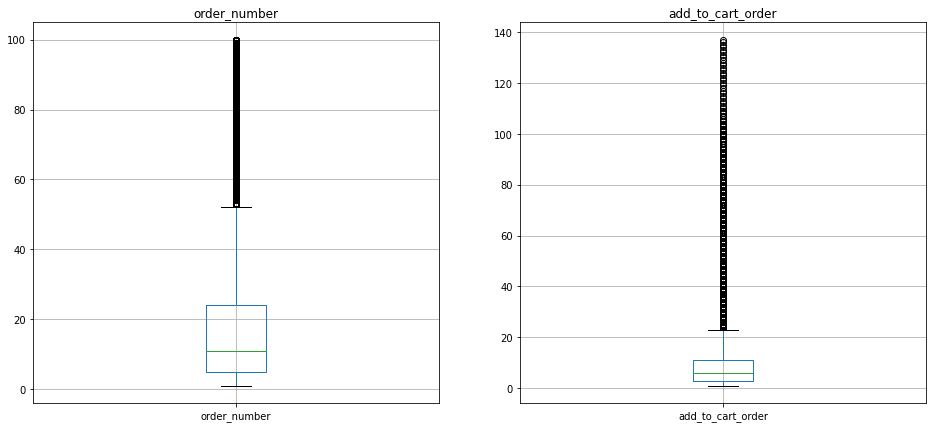

In [0]:
# Select the columns of interest.
selected_cols = ['order_number', 'add_to_cart_order']

# Create a new DataFrame with only the selected columns.
selected_df = df.select(selected_cols)

# Convert the PySpark DataFrame to a Pandas DataFrame.
pandas_df = selected_df.toPandas()

# # Create a figure with subplots for each selected column.
fig, axes = plt.subplots(nrows=1, ncols=len(selected_cols), figsize=(16,7))

# For each selected column, create a boxplot and set the title of the subplot
for i, col in enumerate(selected_cols):
    pandas_df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Show the plot
plt.show()

In [0]:
selected_cols = ['order_number', 'add_to_cart_order']
quantiles = [0.25, 0.5, 0.75]

# Calculate the quartiles of the selected columns
q_values = df.stat.approxQuantile(selected_cols, quantiles, 0.01)

# Print the quartiles for each column
for i in range(len(selected_cols)):
    col_name = selected_cols[i]
    q1, q2, q3 = q_values[i]
    print("Quartiles for column {}: Q1={}, Q2={}, Q3={}".format(col_name, q1, q2, q3))

    # Get the outliers for the column
    lower_bound = q1 - 1.5 * (q3 - q1)
    upper_bound = q3 + 1.5 * (q3 - q1)
    outliers = df.filter((df[col_name] < lower_bound) | (df[col_name] > upper_bound))

    # Print the values of the outliers
    # outlier_values = outliers.select(col_name).collect()
    # print("Outlier values: ", [v[col_name] for v in outlier_values])

    # Print the number of outliers
    outlier_count = outliers.count()
    print("Number of outliers: ", outlier_count)

    # Filter the DataFrame to remove the outliers
    #df = df.filter((df[col_name] >= lower_bound) & (df[col_name] <= upper_bound))

    # Print the number of non-outliers
    non_outlier_count = df.count()
    print("Number of non-outliers: ", non_outlier_count)

Quartiles for column order_number: Q1=5.0, Q2=11.0, Q3=24.0
Number of outliers:  109659
Number of non-outliers:  2014752
Quartiles for column add_to_cart_order: Q1=3.0, Q2=6.0, Q3=12.0
Number of outliers:  61823
Number of non-outliers:  2014752


Since the number of outliers represents a significant amount of data in our dataset, I will keep them as it is.

#####Distribution of values

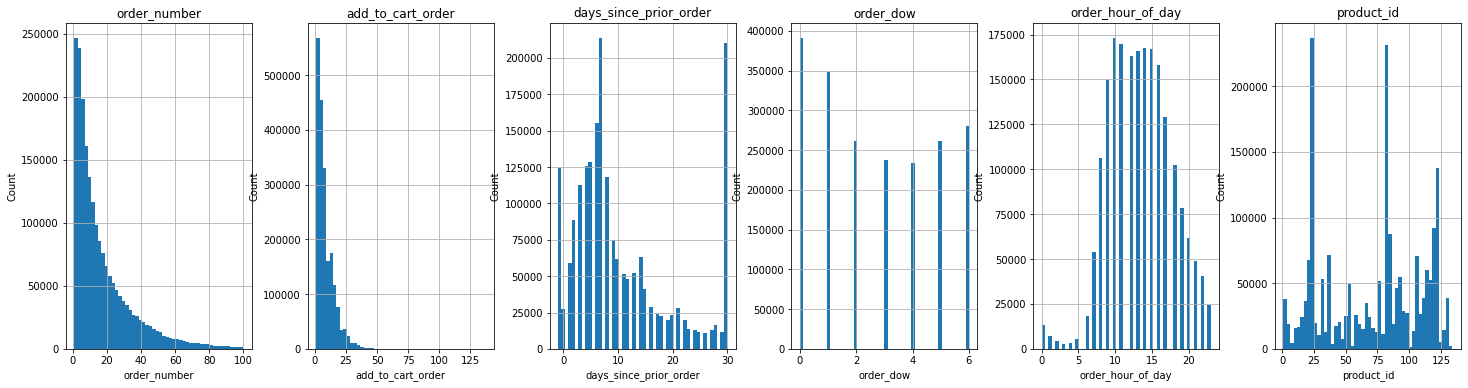

In [0]:
# Define the columns of interest
cols_of_interest = ['order_number', 'add_to_cart_order', 'days_since_prior_order', 'order_dow', 'order_hour_of_day', 'product_id'] 

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(25,6))

# Loop through the columns of interest and create a histogram on each subplot
for i, col in enumerate(cols_of_interest):
    # Select the column and convert it to a Pandas DataFrame
    column = df.select(col).toPandas()
    
    # Create a histogram of the column on the appropriate subplot
    column.hist(bins=50, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    
# Show the histograms
plt.show()

As I can see, order_number and add_to_cart_order columns are positively skewed. I will check if there are 0 values in the skewed will check if there are 0 values in the skewed columns before applying logarithmic transformation. If they have, I will give small constants. Otherwise I will move on.

In [0]:
from pyspark.sql.functions import col

# Select skewed columns
count_cols = ["order_number", "add_to_cart_order"]

# Show the total number of 0 values. 
for col_name in count_cols:
    count_zeros = df.filter(col(col_name) == 0).count()
    print(f"Number of zeros in {col_name}: {count_zeros}")

Number of zeros in order_number: 0
Number of zeros in add_to_cart_order: 0


#####Logarithmic transformation

By applying log transformation, it is aimed to normalize positively skewed data (order_number and add_to_cart_order columns) and, reduce the impact of extreme values since I didn't remove outliers.

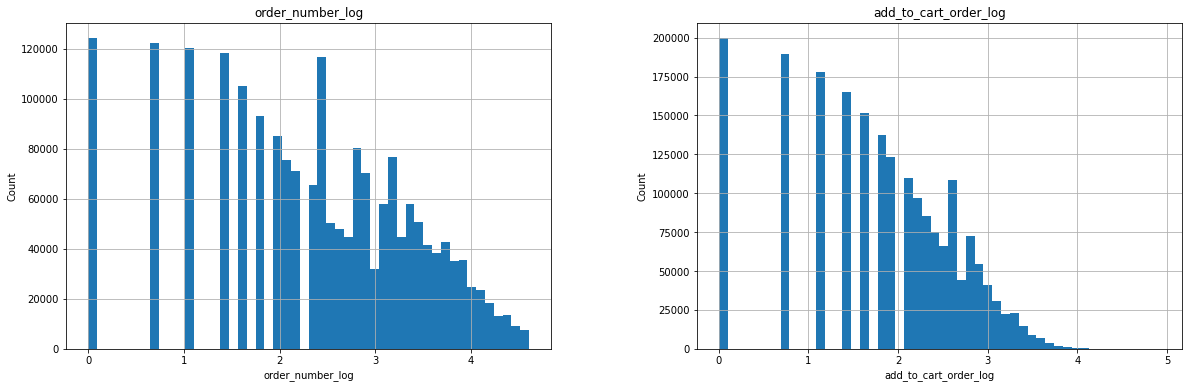

Skewness of order_number before transformation: 1.7787184031162393
Skewness of order_number_log after transformation: -0.28296113905314213
Skewness of add_to_cart_order before transformation: 1.8863632586561794
Skewness of add_to_cart_order_log after transformation: -0.31713370890168957


In [0]:
# create a new DataFrame with log transformed columns
df = df.withColumn("order_number_log", log("order_number"))  \
                   .withColumn("add_to_cart_order_log", log("add_to_cart_order"))
# Define the columns of interest
cols_of_interest = ['order_number_log', 'add_to_cart_order_log']

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Loop through the columns of interest and create a histogram on each subplot
for i, col in enumerate(cols_of_interest):
    # Select the column and convert it to a Pandas DataFrame
    column = df.select(col).toPandas()
    
    # Create a histogram of the column on the appropriate subplot
    column.hist(bins=50, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    
# Show the histograms
plt.show()

not_transformed = ['order_number', 'add_to_cart_order']

# Loop through the columns of interest and display the skewness before and after the log transformation
for col in not_transformed:
    # Calculate the skewness of the column
    skew_before = df.select(skewness(col)).collect()[0][0]
    print(f"Skewness of {col} before transformation: {skew_before}")
    
    # Calculate the skewness of the transformed column
    transformed_col = col + '_log'
    skew_after = df.select(skewness(transformed_col)).collect()[0][0]
    print(f"Skewness of {transformed_col} after transformation: {skew_after}")

<span> The original order_number and add_to_cart_order columns have a positive skewness value, indicating that the majority of the values are concentrated towards the lower end of the range, and there are some extreme values on the higher end. After applying the logarithmic transformation, the skewness values of both columns have significantly decreased, approaching a normal distribution with a skewness value close to 0. This suggests that the transformation has made the distribution more symmetrical, which can help improve the accuracy of the model. </span>

#####Data Preparation & Transformation

I converted the numerical values 0-6, where 0 is Sunday, to days as a new column named order_day, for a more comfortable sight.

In [0]:
df = df.withColumn("order_day", 
                    when(df["order_dow"] == 0, "Sunday")
                   .when(df["order_dow"] == 1, "Monday")
                   .when(df["order_dow"] == 2, "Tuesday")
                   .when(df["order_dow"] == 3, "Wednesday")
                   .when(df["order_dow"] == 4, "Thursday")
                   .when(df["order_dow"] == 5, "Friday")
                   .when(df["order_dow"] == 6, "Saturday")
                   .otherwise(None))

df.select(['order_dow', 'order_day']).sample(fraction=0.1, seed=50).show(5)

+---------+---------+
|order_dow|order_day|
+---------+---------+
|        2|  Tuesday|
|        3|Wednesday|
|        3|Wednesday|
|        0|   Sunday|
|        6| Saturday|
+---------+---------+
only showing top 5 rows



In [0]:
# Drop the column that I will not use in our analysis. 
df_cleaned = df.drop("user_id")

df_cleaned.columns

Out[15]: ['order_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'department_id',
 'department',
 'product_name',
 'order_day']

I decided to create a new feature combining the order_dow and order_hour_of_day columns to use in our predictive models in order to see that it will affect the importance of features in models. Further, I will compare features and get the best features for our models.

In [0]:
df_cleaned = df_cleaned.withColumn('time_slot',
                                   F.when(
                                       ((df_cleaned.order_dow >= 1) & (df_cleaned.order_dow <= 5) & (df_cleaned.order_hour_of_day >= 6) & (df_cleaned.order_hour_of_day < 12)),
                                       'Weekday Morning'
                                   ).when(
                                       ((df_cleaned.order_dow >= 1) & (df_cleaned.order_dow <= 5) & (df_cleaned.order_hour_of_day >= 12) & (df_cleaned.order_hour_of_day < 18)),
                                       'Weekday Afternoon'
                                   ).when(
                                       ((df_cleaned.order_dow >= 1) & (df_cleaned.order_dow <= 5) & (df_cleaned.order_hour_of_day >= 18) & (df_cleaned.order_hour_of_day < 22)),
                                       'Weekday Evening'
                                   ).when(
                                       ((df_cleaned.order_dow >= 1) & (df_cleaned.order_dow <= 5) & ((df_cleaned.order_hour_of_day >= 22) | (df_cleaned.order_hour_of_day < 6))),
                                       'Weekday Night'
                                   ).when(
                                       ((df_cleaned.order_dow == 0) & (df_cleaned.order_hour_of_day >= 6) & (df_cleaned.order_hour_of_day < 12)),
                                       'Weekend Morning'
                                   ).when(
                                       ((df_cleaned.order_dow == 0) & (df_cleaned.order_hour_of_day >= 12) & (df_cleaned.order_hour_of_day < 18)),
                                       'Weekend Afternoon'
                                   ).when(
                                       ((df_cleaned.order_dow == 0) & (df_cleaned.order_hour_of_day >= 18) & (df_cleaned.order_hour_of_day < 22)),
                                       'Weekend Evening'
                                   ).when(
                                       ((df_cleaned.order_dow == 0) & ((df_cleaned.order_hour_of_day >= 22) | (df_cleaned.order_hour_of_day < 6))),
                                       'Weekend Night'
                                   ).when(
                                       (df_cleaned.order_dow == 6) & (df_cleaned.order_hour_of_day >= 6) & (df_cleaned.order_hour_of_day < 12),
                                       'Weekend Morning'
                                   ).when(
                                       (df_cleaned.order_dow == 6) & (df_cleaned.order_hour_of_day >= 12) & (df_cleaned.order_hour_of_day < 18),
                                       'Weekend Afternoon'
                                   ).when(
                                       (df_cleaned.order_dow == 6) & (df_cleaned.order_hour_of_day >= 18) & (df_cleaned.order_hour_of_day < 22),
                                       'Weekend Evening'
                                   ).when(
                                       (df_cleaned.order_dow == 6) & ((df_cleaned.order_hour_of_day >= 22) | (df_cleaned.order_hour_of_day < 6)),
                                       'Weekend Night'
                                   ).otherwise('Unknown Time Slot'))

In [0]:
# Show the results of time_slot column.
df_cleaned.show(5)

+--------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------------+---------+---------------+
|order_id|order_number|order_dow|order_hour_of_day|days_since_prior_order|product_id|add_to_cart_order|reordered|department_id|department|      product_name|order_day|      time_slot|
+--------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------------+---------+---------------+
| 2425083|           1|        2|               18|                    -1|        17|                1|        0|           13|    pantry|baking ingredients|  Tuesday|Weekday Evening|
| 2425083|           1|        2|               18|                    -1|        91|                2|        0|           16|dairy eggs|   soy lactosefree|  Tuesday|Weekday Evening|
| 2425083|           1|        2|               18|                    -1|      

####Exploratory Data Analysis (EDA)

##### Distribution of number of purchases by day and hour

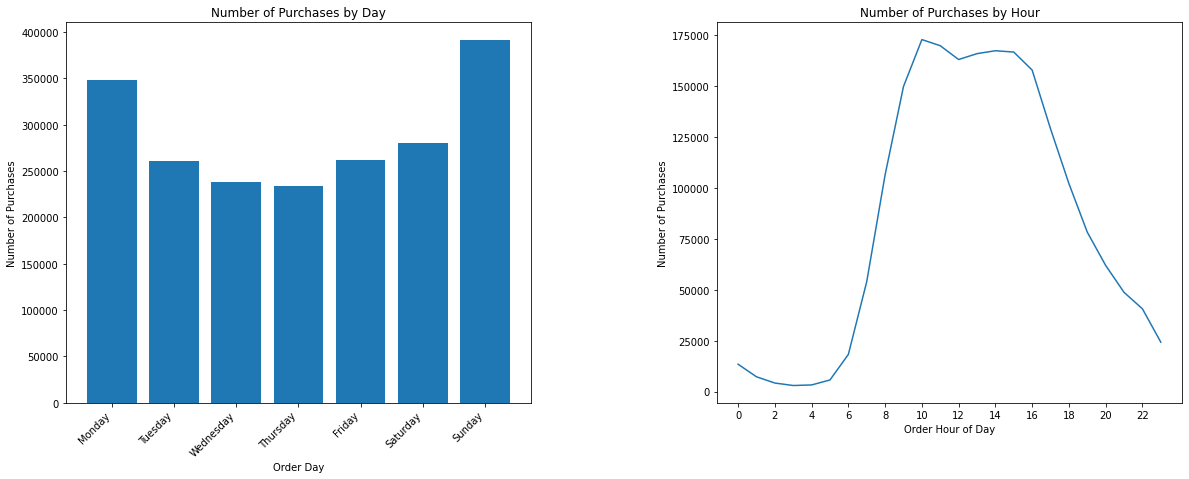

In [0]:
# Define the order of days of the week
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group the DataFrame by the order_day column and count the number of occurrences
purchases_by_day = df_cleaned.groupBy("order_day").count()

# Convert the DataFrame to a Pandas DataFrame for plotting
purchases_by_day_pd = purchases_by_day.toPandas()

# Sort the data by the order of the days of the week
purchases_by_day_pd["order_day"] = pd.Categorical(purchases_by_day_pd["order_day"], categories=weekday_order, ordered=True)
purchases_by_day_pd = purchases_by_day_pd.sort_values("order_day")

# Group the DataFrame by the order_hour_of_day column and count the number of occurrences
purchases_by_hour = df_cleaned.groupBy("order_hour_of_day").agg(F.count("*").alias("count"))

# Convert the DataFrame to a Pandas DataFrame
purchases_by_hour_pd = purchases_by_hour.toPandas()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the number of purchases by day as a bar plot in the first subplot
ax1.bar(purchases_by_day_pd["order_day"], purchases_by_day_pd["count"])
ax1.set_title("Number of Purchases by Day")
ax1.set_xlabel("Order Day")
ax1.set_ylabel("Number of Purchases")
ax1.set_xticks(range(len(purchases_by_day_pd["order_day"])))
ax1.set_xticklabels(purchases_by_day_pd["order_day"], rotation=45, ha="right")

# Plot the number of purchases by hour as a line plot in the second subplot
sns.lineplot(x="order_hour_of_day", y="count", data=purchases_by_hour_pd, ax=ax2)
ax2.set_title("Number of Purchases by Hour")
ax2.set_xlabel("Order Hour of Day")
ax2.set_ylabel("Number of Purchases")
ax2.set_xticks(range(0, 24, 2))  # Set the x-axis ticks to every two hours
ax2.set_xticklabels([str(hour) for hour in range(0, 24, 2)]) 

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

##### Top 10 Products and Departments by number of purchases

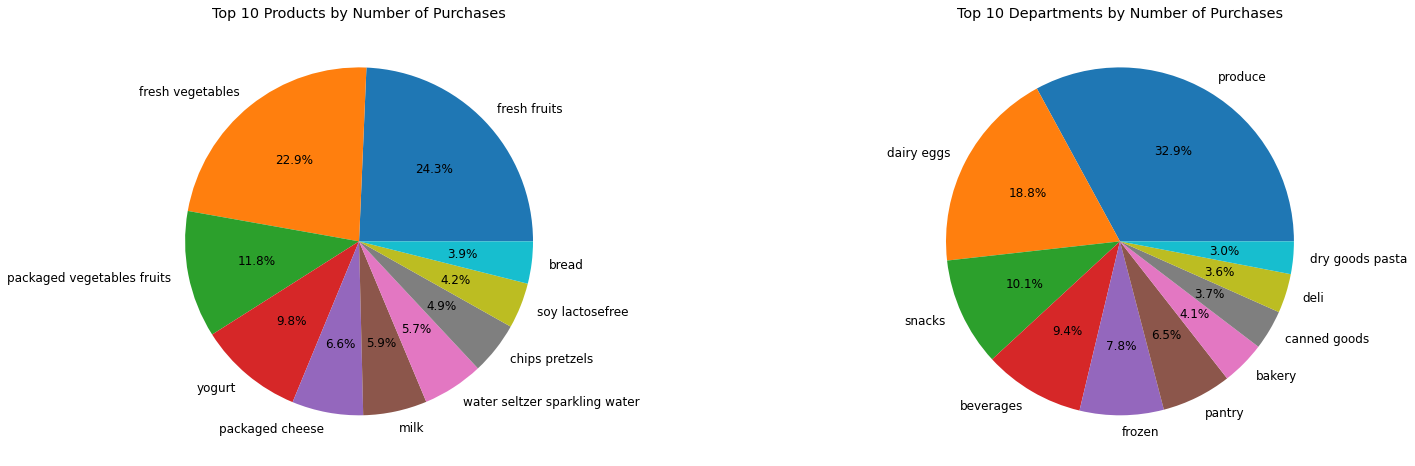

In [0]:
# Group the DataFrame by product_name and count the number of occurrences
product_counts = df_cleaned.groupBy("product_name").agg(F.count("*").alias("count"))

# Sort the products by the number of purchases in descending order and select the top 10
top_products = product_counts.orderBy(F.desc("count")).limit(10)

# Convert the top_products DataFrame to a Pandas DataFrame for plotting
top_products_pd = top_products.toPandas()

# Group the DataFrame by department and count the number of occurrences
dept_counts = df_cleaned.groupBy("department").agg(F.count("*").alias("count"))

# Sort the departments by the number of purchases in descending order
top_depts = dept_counts.orderBy(F.desc("count")).limit(10)

# Convert the top_depts DataFrame to a Pandas DataFrame for plotting
top_depts_pd = top_depts.toPandas()

# Set the font size
plt.rcParams.update({'font.size': 12})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

# Create a pie chart of the top 10 products and add it to the first subplot
ax1.pie(top_products_pd["count"], labels=top_products_pd["product_name"], autopct="%1.1f%%")
ax1.set_title("Top 10 Products by Number of Purchases")

# Create a pie chart of the top 10 departments and add it to the second subplot
ax2.pie(top_depts_pd["count"], labels=top_depts_pd["department"], autopct="%1.1f%%")
ax2.set_title("Top 10 Departments by Number of Purchases")

# Show the chart
plt.show()

##### Frequency of unique values in the 'days_since_prior_order' column

In [0]:
%sql
SELECT days_since_prior_order, COUNT(*) AS count
FROM big_data
GROUP BY days_since_prior_order
ORDER BY count DESC;

days_since_prior_order,count
7,213565
30,210382
6,155306
5,128775
4,125925
-1,124201
8,118452
3,112934
2,88456
9,74944


##### Top and Bottom 10 Products for Reordered Rate column

I want to see the reordered rate for different product groups. The bar charts below show us the most and the least reordered products and their rates.

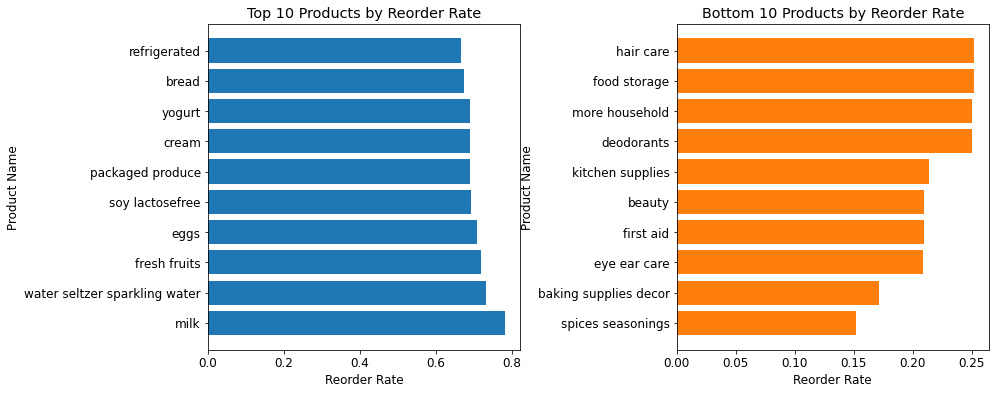

In [0]:
# Group the data by product and calculate the reorder rate for top 10 products
top_reorder_rates = df_cleaned.groupBy("product_name").agg(
    count("*").alias("num_orders"),
    sum("reordered").alias("num_reordered"),
    (sum("reordered") / count("*")).alias("reorder_rate")
).orderBy("reorder_rate", ascending=False).limit(10)

# Group the data by product and calculate the reorder rate for bottom 10 products
bottom_reorder_rates = df_cleaned.groupBy("product_name").agg(
    count("*").alias("num_orders"),
    sum("reordered").alias("num_reordered"),
    (sum("reordered") / count("*")).alias("reorder_rate")
).orderBy("reorder_rate", ascending=True).limit(10)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top 10 products in the left subplot
ax1.barh(top_reorder_rates.toPandas()["product_name"], 
         top_reorder_rates.toPandas()["reorder_rate"], 
         color="tab:blue")
ax1.set_title("Top 10 Products by Reorder Rate")
ax1.set_xlabel("Reorder Rate")
ax1.set_ylabel("Product Name")

# Plot the bottom 10 products in the right subplot
ax2.barh(bottom_reorder_rates.toPandas()["product_name"], 
         bottom_reorder_rates.toPandas()["reorder_rate"], 
         color="tab:orange")
ax2.set_title("Bottom 10 Products by Reorder Rate")
ax2.set_xlabel("Reorder Rate")
ax2.set_ylabel("Product Name")

# Adjust the layout and display the plot
plt.subplots_adjust(wspace=0.5)
plt.show()

In [0]:
# Calculate the proportion of reordered products
reorder_prop = df_cleaned.select(avg("reordered")).collect()[0][0]

print("Proportion of reordered products:", reorder_prop)

# The proportion of reordered products is approximately 59%, which means that 59% of the products purchased by customers were products they had bought before.

Proportion of reordered products: 0.5902096138879623


##### Top 5 Products with Purchase Conversion Rates

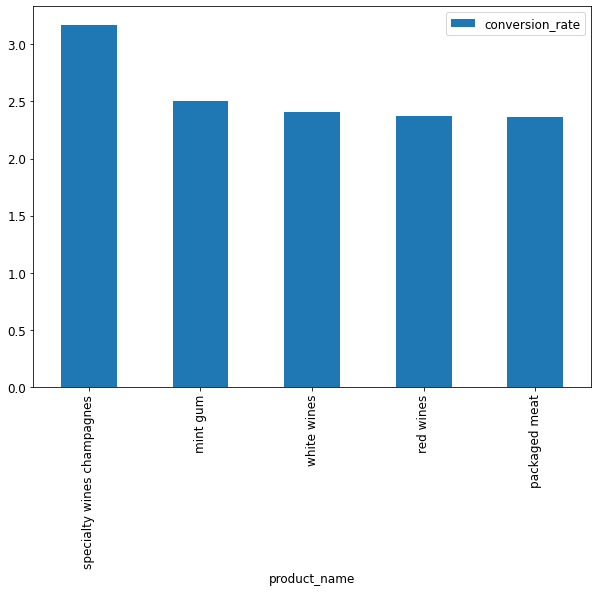

+--------------------+-----------------+--------------+------------------+
|        product_name|add_to_cart_count|purchase_count|   conversion_rate|
+--------------------+-----------------+--------------+------------------+
|specialty wines c...|               23|            73|3.1739130434782608|
|            mint gum|               34|            85|               2.5|
|         white wines|               37|            89|2.4054054054054053|
|           red wines|               35|            83|2.3714285714285714|
|       packaged meat|               41|            97|2.3658536585365852|
+--------------------+-----------------+--------------+------------------+



In [0]:
# Group the data by product name and calculate the number of times each product was added to cart and purchased
grouped_df = df_cleaned.groupBy('product_name') \
                      .agg(F.countDistinct('add_to_cart_order_log').alias('add_to_cart_count'),
                           F.countDistinct('order_number_log').alias('purchase_count'))

# Calculate the conversion rate for each product
conversion_rate_df = grouped_df.withColumn('conversion_rate', grouped_df['purchase_count'] / grouped_df['add_to_cart_count'])

# Sort by conversion rate in descending order and show the top 5 products
top_products = conversion_rate_df.orderBy(F.desc('conversion_rate')).limit(5)

# Convert the DataFrame to Pandas and plot the conversion rate
top_products_pd = top_products.toPandas()
top_products_pd.plot(kind='bar', x='product_name', y='conversion_rate', figsize=(10,7))
plt.show()

# Show the top products
top_products.show()

The outcome of this anaylsis is interesting since the purhase count is higher than add_to_cart_count. The process of a purchase transaction is completed by adding the product to the cart then checkout sequentially. The logical explanations to this discrepency would be:  

- The customers increasing the quantity of products that are already in the cart and then make the payment. 
- Users in the dataset could be tend to make direct purchases without adding items to their carts. This behavior could be influenced by factors such as urgency, familiarity with the product, or previous purchase history. Some users might prefer to skip the intermediate step of adding items to their cart and proceed directly to purchase. 
- The design and functionality of the user interface on the website or application where the data was collected could play a role. If the purchase process is straightforward and, prominently displayed, users might be more likely to make direct purchases. On the other hand, if the add to cart feature is less visible or requires extra steps, users might be less inclined to use it.

In addition, the table shows the top five products based on their conversion rates. The conversion rate is calculated as the number of purchases divided by the number of times the product was added to the cart. For example, the first product on the list, "specialty wines champagnes", was added to the cart 23 times and purchased 72 times, resulting in a conversion rate of 3.13. The insights I can gather from this table is that these products are the most effective in converting cart additions into purchases. Stakeholders may want to focus on promoting these products more to increase their sales. It may also be helpful to investigate why these products are performing well and use those insights to improve the sales of other products.

##### The most frequently purchased products within each department

In [0]:
%sql
SELECT department, product_name, COUNT(*) as count
FROM big_data
GROUP BY department, product_name
ORDER BY department, count DESC
LIMIT 10;

department,product_name,count
alcohol,beers coolers,3002
alcohol,red wines,2135
alcohol,white wines,1893
alcohol,spirits,1795
alcohol,specialty wines champagnes,614
babies,baby food formula,23355
babies,diapers wipes,1566
babies,baby bath body care,515
babies,baby accessories,504
bakery,bread,36381


#####Association rules between products

In [0]:
#Group the products by order and collect them into a list:
order_products = df_cleaned.groupby("order_id").agg(collect_set("product_name").alias("products"))

#Train the FPGrowth model on the list of products:
fp_growth = FPGrowth(itemsCol="products", minSupport=0.001, minConfidence=0.5)
model = fp_growth.fit(order_products)

#Generate the association rules and show the top 5:
association_rules = model.associationRules
association_rules.show(5)

+--------------------+--------------------+------------------+------------------+--------------------+
|          antecedent|          consequent|        confidence|              lift|             support|
+--------------------+--------------------+------------------+------------------+--------------------+
|[nuts seeds dried...|   [packaged cheese]|0.5666666666666667|2.4529225019300562|0.001190113060740...|
|[nuts seeds dried...|[packaged vegetab...|0.6928571428571428| 1.895902799361196|0.001455138238132...|
|[nuts seeds dried...|      [fresh fruits]|0.8666666666666667|1.5586189324244524|0.001820172916427...|
|[nuts seeds dried...|            [yogurt]|0.6404761904761904|2.4288057086871917|0.001345127787139...|
|[frozen pizza, eg...|[packaged vegetab...|0.7278481012658228|1.9916504678138625|0.001150109260379736|
+--------------------+--------------------+------------------+------------------+--------------------+
only showing top 5 rows



I grouped by order_id to find all product names that belong to each order_id.

- Rule 1 indicates a moderate association between "packaged vegetables fruits" and "fresh vegetables" with a confidence of 69.1% and a lift of 1.556.
- Rule 2 shows a strong association between "yogurt, packaged vegetables fruits" and "fresh fruits" with a confidence of 82.7% and a lift of 1.488.
- Rule 3 demonstrates a moderate association between "yogurt, packaged vegetables fruits" and "fresh vegetables" with a confidence of 68.8% and a lift of 1.548.

- The combination of "condiments," "canned jarred vegetables," "fresh herbs," "packaged vegetables fruits," and "fresh fruits" has a confidence of 97.5% and a lift of 2.195, indicating a strong association with "fresh vegetables."
- The combination of "canned meals beans," "fresh herbs," "frozen produce," "soy lactose-free," and "fresh fruits" also has a confidence of 97.5% and a lift of 2.194, suggesting a strong association with "fresh vegetables."
- The combination of "baby food formula," "soy lactose-free," "packaged cheese," "yogurt," "packaged vegetables fruits," and "fresh vegetables" has a confidence of 97.4% and a lift of 1.752, indicating a strong association with "fresh fruits."

#####Multicollinearity analysis

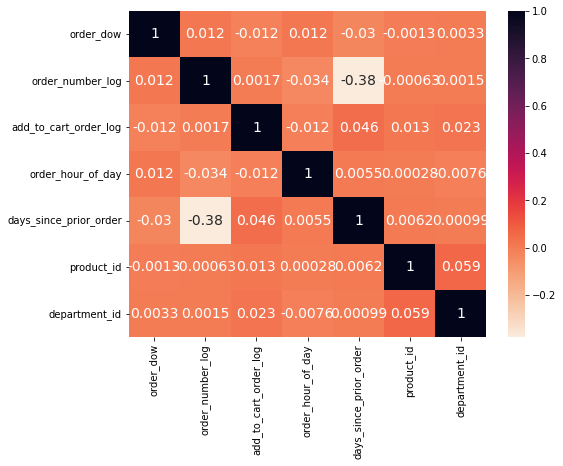

In [0]:
# Use VectorAssembler to combine columns into a single vector column
assembler = VectorAssembler(inputCols=["order_dow", "order_number_log", "add_to_cart_order_log", "order_hour_of_day", 'days_since_prior_order', 'product_id', 'department_id'], outputCol="features")
df_corr = assembler.transform(df_cleaned).select("features")

# Compute the correlation matrix using Pearson correlation
pearson_correlation = Correlation.corr(df_corr, "features", "pearson").collect()[0][0]

# Convert the correlation matrix to a NumPy array
corr_matrix = pearson_correlation.toArray()

# Get the column names as a list
column_names = df_corr.schema["features"].metadata["ml_attr"]["attrs"]["numeric"] 
column_names = [c["name"] for c in column_names]

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap using Seaborn with column names as labels
sns.heatmap(corr_matrix, cmap=sns.cm.rocket_r, annot=True, annot_kws={"size": 14}, xticklabels=column_names, yticklabels=column_names)

# Display the plot
plt.show()

####MODEL

##### Feature Engineering

Exclude -1 (new customers) values. When it's new_customer, reordered is always 0. It doesn't give valuable information. For this reason, they are excluded from predictive modeling.

In [0]:
df_cleaned = df_cleaned.filter(df_cleaned.days_since_prior_order != '-1')

In [0]:
## 2.4 Convert Education and Marital_Status columns to numerical form by applying one-hot encoding to the indexed columns
indexer_edu = StringIndexer(inputCol='time_slot', outputCol='time_slotIndex')   
df_cleaned = indexer_edu.fit(df_cleaned).transform(df_cleaned)    
 
 
encoder = OneHotEncoder(inputCols=['time_slotIndex', ],            
                                 outputCols=['time_slotVec']) 
model = encoder.fit(df_cleaned)                                             
df_cleaned = model.transform(df_cleaned)

In [0]:
df_cleaned.show(5)

+--------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------------+---------+---------------+
|order_id|order_number|order_dow|order_hour_of_day|days_since_prior_order|product_id|add_to_cart_order|reordered|department_id|department|      product_name|order_day|      time_slot|
+--------+------------+---------+-----------------+----------------------+----------+-----------------+---------+-------------+----------+------------------+---------+---------------+
| 2425083|           1|        2|               18|                    -1|        17|                1|        0|           13|    pantry|baking ingredients|  Tuesday|Weekday Evening|
| 2425083|           1|        2|               18|                    -1|        91|                2|        0|           16|dairy eggs|   soy lactosefree|  Tuesday|Weekday Evening|
| 2425083|           1|        2|               18|                    -1|      

I tried some combinations as the comments below, and choose the best feature combination for our predictive models.  
Selected features: 'department_id', 'order_number_log', 'add_to_cart_order_log', 'order_hour_of_day', 'days_since_prior_order', 'order_dow'

In [0]:
# 'department_id', 'order_number_log', 'add_to_cart_order_log', 'order_hour_of_day', 'days_since_prior_order', 'order_dow' #the best 
# 'order_number_log', 'add_to_cart_order_log', 'days_since_prior_order'
# 'department_id', 'order_number_log', 'add_to_cart_order_log', 'time_slotVec', 'days_since_prior_order'
# 'department_id', 'order_number_log', 'add_to_cart_order_log', 'order_hour_of_day', 'days_since_prior_order', 'time_slotVec'

In [0]:
# Prepare dataset for ML models
input_features = ['department_id', 'order_number_log', 'add_to_cart_order_log', 'order_hour_of_day', 'days_since_prior_order', 'order_dow']
 
assembler = VectorAssembler(inputCols=input_features, outputCol="features")   
normalizer = Normalizer(inputCol="features", outputCol="normalized_features")

#####Split the data

Since we have a big data, I wanted to create a sample data to reduce processing times.

In [0]:
# Sampling fraction
sample_fraction = 0.04

# Create a sample using the sample() method
sample_df = df_cleaned.sample(withReplacement=False, fraction=sample_fraction, seed=42)

sample_df.count()

Out[19]: 75472

In [0]:
selected_cols = ['reordered', 'department_id', 'order_number_log', 'add_to_cart_order_log', 'order_hour_of_day', 'days_since_prior_order', 'order_dow'] 

# Shuffle the sample data randomly and select the desired columns
shuffled_data = sample_df.select(selected_cols).orderBy(rand())

# Split the data into train and test sets while ensuring similar distributions of the target variable
train_data, test_data = shuffled_data.randomSplit([0.8, 0.2], seed=42)

# Calculate and print the train set distribution
train_counts = train_data.groupBy('reordered').count().orderBy('reordered')
print('Train Set Distribution:')
var = np.array(train_counts.select("count").collect())
print(var[1][0] / (var[1][0] + var[0][0]) * 100)
train_counts.show()

# Calculate and print the test set distribution
test_counts = test_data.groupBy('reordered').count().orderBy('reordered')
print('Test Set Distribution:')
var = np.array(test_counts.select("count").collect())
print(var[1][0] / (var[1][0] + var[0][0]) * 100)
test_counts.show()

Train Set Distribution:
62.94613350958361
+---------+-----+
|reordered|count|
+---------+-----+
|        0|22423|
|        1|38101|
+---------+-----+

Test Set Distribution:
63.735455396549426
+---------+-----+
|reordered|count|
+---------+-----+
|        0| 5422|
|        1| 9533|
+---------+-----+



The counts of responses 1 and 0 in the train and test sets show that there are more reordered responses (1) than non-reordered responses (0) in the dataset. When interpreting the model's performance and accuracy, as it is likely that the model will perform better at predicting reordered items than non-reordered items due to the class imbalance. Below, I will be sampling the data by giving class ratios to make it balance.  

Balancing data is important in machine learning to prevent bias, improve model performance, and enhance feature learning by ensuring that each class has equal representation. It reduces the risk of overfitting and increases interpretability, leading to more accurate and reliable predictions across all classes.

#####Balance the data

In [0]:
# Calculate the class distribution in the training set
train_class_dist = train_data.groupBy('reordered').count().orderBy('reordered')
train_class_dist = train_class_dist.withColumn('class_weight', 1 / col('count'))

# Add a class weight column to the training set
training_weighted = train_data.join(train_class_dist, 'reordered')

# Define the class ratios you desire for sampling
class_ratios = {
    0: 0.85,  # Desired ratio for class 0  
    1: 0.50   # Desired ratio for class 1  
}

# Apply the sampler to balance the classes in the training set
training_balanced = training_weighted.sampleBy('reordered', fractions=class_ratios, seed=42)

# Apply the same sampler to the test set
test_balanced = test_data.sampleBy('reordered', fractions=class_ratios, seed=42)

# Calculate the class distribution in the balanced training set
balanced_train_counts = training_balanced.groupBy('reordered').count().orderBy('reordered')

# Print the distribution of the balanced training set
print('Balanced Train Set Distribution:')
var = np.array(balanced_train_counts.select("count").collect())
print(var[1][0]/(var[1][0]+var[0][0])*100)
balanced_train_counts.show()

# Calculate the class distribution in the balanced test set
balanced_test_counts = test_balanced.groupBy('reordered').count().orderBy('reordered')

# Print the distribution of the balanced test set
print('Balanced Test Set Distribution:')
var = np.array(balanced_test_counts.select("count").collect())
print(var[1][0]/(var[1][0]+var[0][0])*100)
balanced_test_counts.show()

Balanced Train Set Distribution:
49.93453440871478
+---------+-----+
|reordered|count|
+---------+-----+
|        0|19120|
|        1|19074|
+---------+-----+

Balanced Test Set Distribution:
50.85176171833668
+---------+-----+
|reordered|count|
+---------+-----+
|        0| 4645|
|        1| 4808|
+---------+-----+



#####Pipeline creation

In [0]:
lr = LogisticRegression(featuresCol='normalized_features', labelCol='reordered')    
rf = RandomForestClassifier(featuresCol='normalized_features', labelCol='reordered')
gbt = GBTClassifier(featuresCol='normalized_features', labelCol='reordered')    

lr_pipeline = Pipeline(stages=[assembler, normalizer, lr])
rf_pipeline = Pipeline(stages=[assembler, normalizer, rf])
gbt_pipeline = Pipeline(stages=[assembler, normalizer, gbt])
 
# Train the models
lr_model = lr_pipeline.fit(training_balanced)          
rf_model = rf_pipeline.fit(training_balanced)          
gbt_model = gbt_pipeline.fit(training_balanced)

I created three machine learning models (Logistic Regression, Random Forest, and Gradient Boosted Tree) and trained them using a balanced training dataset. Each model was trained using a pipeline that included data preprocessing steps such as feature assembling and normalization.

#####Comparison of models

Logistic Regression AUC: 0.7059630388176146
Random Forest AUC: 0.70515435871338
Gradient Boosted Trees AUC: 0.7181811240022009


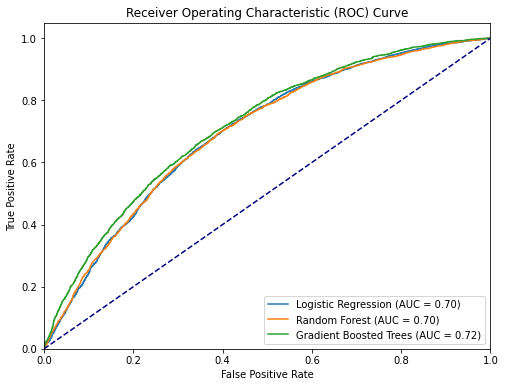

In [0]:
# Make predictions
lr_predictions = lr_model.transform(test_balanced)
rf_predictions = rf_model.transform(test_balanced)
gbt_predictions = gbt_model.transform(test_balanced)

# Evaluate the models
evaluator = BinaryClassificationEvaluator(labelCol='reordered', metricName='areaUnderROC')

lr_auc = evaluator.evaluate(lr_predictions)
rf_auc = evaluator.evaluate(rf_predictions)
gbt_auc = evaluator.evaluate(gbt_predictions)

print("Logistic Regression AUC:", lr_auc)
print("Random Forest AUC:", rf_auc)
print("Gradient Boosted Trees AUC:", gbt_auc)

# Compare the performance
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosted Trees']
performance = [lr_auc, rf_auc, gbt_auc]

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, pred in zip(model_names, [lr_predictions, rf_predictions, gbt_predictions]):
    results = pred.select(['probability', 'reordered']).collect()
    probs = [float(i[0][1]) for i in results]
    labels = [i[1] for i in results]
    fpr, tpr, _ = roc_curve(labels, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

I evaluated the performance of three machine learning models by making predictions on a balanced test dataset and calculating the area under the ROC curve (AUC) as a metric. I then compared the AUC values of the models and visualized their ROC curves. The AUC values obtained were 0.706 for Logistic Regression(LR), 0.705 for Random Forest(RF), and 0.718 for Gradient Boosted Trees(GBT). 

Among the results, I will take the two best models LR and GBT, and I will perform hyperparameter tuning using cross-validation and grid search.

In [0]:
import time
start_time = time.time()
 
 
def calcElapsedTime(start_time):
    end_time = time.time()
    elapsed_time = end_time - start_time    
    return elapsed_time

#####Hyper-parameter tuning using cross-validation and grid search

Fitting Model 1...
Elapsed time: 1445.459469795227 seconds
Fitting Model 2...
Elapsed time: 9834.941793680191 seconds
Best Logistic Regression AUC:  0.7026129570756284
Best Gradient Boosted Trees AUC:  0.7215015036282618


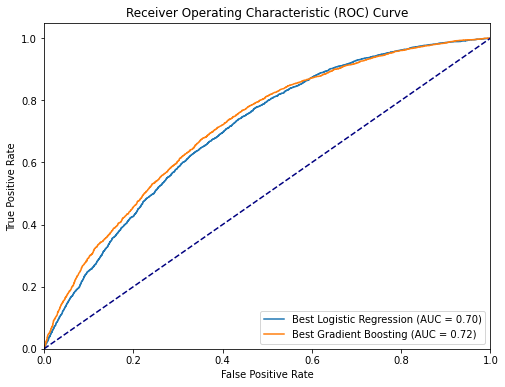

In [0]:
# Logistic Regression hyperparameters
lr_param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5]) \
    .build()
 
# Gradient Boosted Trees hyperparameters
gbt_param_grid = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [3, 5]) \
    .addGrid(gbt.maxIter, [10, 20]) \
    .build()
 
# CrossValidator for each model
cv_lr = CrossValidator(estimator=lr_pipeline,
                       estimatorParamMaps=lr_param_grid,
                       evaluator=evaluator,
                       numFolds=2,
                       seed=42)
 
cv_gbt = CrossValidator(estimator=gbt_pipeline,
                        estimatorParamMaps=gbt_param_grid,
                        evaluator=evaluator,
                        numFolds=2,
                        seed=42)
 
# Train and get the best models
print("Fitting Model 1..."); best_lr_model = cv_lr.fit(training_balanced).bestModel   ; elapsed_time = calcElapsedTime(start_time);print(f"Elapsed time: {elapsed_time} seconds")
print("Fitting Model 2..."); best_gbt_model = cv_gbt.fit(training_balanced).bestModel ; elapsed_time = calcElapsedTime(start_time);print(f"Elapsed time: {elapsed_time} seconds")  
 
# Make predictions using the best models
best_lr_predictions = best_lr_model.transform(test_balanced)
best_gbt_predictions = best_gbt_model.transform(test_balanced)  
 
# Evaluate the best models
best_lr_auc = evaluator.evaluate(best_lr_predictions)
best_gbt_auc = evaluator.evaluate(best_gbt_predictions) 
 
print("Best Logistic Regression AUC: ", best_lr_auc)
print("Best Gradient Boosted Trees AUC: ", best_gbt_auc) 

best_model_names = ['Best Logistic Regression', 'Best Gradient Boosting']
best_performance = [best_lr_auc, best_gbt_auc]

plt.figure(figsize=(8, 6))
for name, pred in zip(best_model_names, [best_lr_predictions, best_gbt_predictions]):
    results = pred.select(['probability', 'reordered']).collect()
    probs = [float(i[0][1]) for i in results]
    labels = [i[1] for i in results]
    fpr, tpr, _ = roc_curve(labels, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

I trained the best two models with different hyperparameter combinations I visualized the ROC curves of the best models. With the best parameters, the results are slightly increased.

#####Classification Report

In [0]:
# Define the evaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="reordered")

# Compute classification metrics for Logistic Regression
lr_accuracy = evaluator.evaluate(best_lr_predictions, {evaluator.metricName: "accuracy"})
lr_precision = evaluator.evaluate(best_lr_predictions, {evaluator.metricName: "weightedPrecision"})
lr_recall = evaluator.evaluate(best_lr_predictions, {evaluator.metricName: "weightedRecall"})
lr_f1_score = evaluator.evaluate(best_lr_predictions, {evaluator.metricName: "f1"})

# Compute classification metrics for Gradient Boosted Trees
gbt_accuracy = evaluator.evaluate(best_gbt_predictions, {evaluator.metricName: "accuracy"})
gbt_precision = evaluator.evaluate(best_gbt_predictions, {evaluator.metricName: "weightedPrecision"})
gbt_recall = evaluator.evaluate(best_gbt_predictions, {evaluator.metricName: "weightedRecall"})
gbt_f1_score = evaluator.evaluate(best_gbt_predictions, {evaluator.metricName: "f1"})

# Print the classification report
print("Best Logistic Regression:")
print("  Accuracy: {:.4f}".format(lr_accuracy))
print("  Precision: {:.4f}".format(lr_precision))
print("  Recall: {:.4f}".format(lr_recall))
print("  F1-Score: {:.4f}".format(lr_f1_score))
print("---")
print("Best Gradient Boosted Trees:")
print("  Accuracy: {:.4f}".format(gbt_accuracy))
print("  Precision: {:.4f}".format(gbt_precision))
print("  Recall: {:.4f}".format(gbt_recall))
print("  F1-Score: {:.4f}".format(gbt_f1_score))

Best Logistic Regression:
  Accuracy: 0.6458
  Precision: 0.6481
  Recall: 0.6504
  F1-Score: 0.6459
---
Best Gradient Boosted Trees:
  Accuracy: 0.6601
  Precision: 0.6661
  Recall: 0.6579
  F1-Score: 0.6626


The best performing model was Gradient Boosted Trees, which achieved an accuracy of 0.6601. It outperformed the Logistic Regression model, which had an accuracy of 0.6458. Both models showed similar precision, with Gradient Boosted Trees achieving slightly higher recall and F1-Score values, indicating its ability to better balance between identifying positive cases and minimizing false negatives.

#####Features and coefficients importance extraction

Important features for Logistic Regression:
                  feature  coefficient
1        order_number_log    11.300174
3       order_hour_of_day     0.723723
4  days_since_prior_order     0.619604
0           department_id     0.352384
5               order_dow    -0.384487
2   add_to_cart_order_log    -7.462705

Important features for Gradient Boosted Trees:
                  feature  importance
1        order_number_log    0.329163
0           department_id    0.212325
2   add_to_cart_order_log    0.181470
4  days_since_prior_order    0.136543
3       order_hour_of_day    0.072755
5               order_dow    0.067743


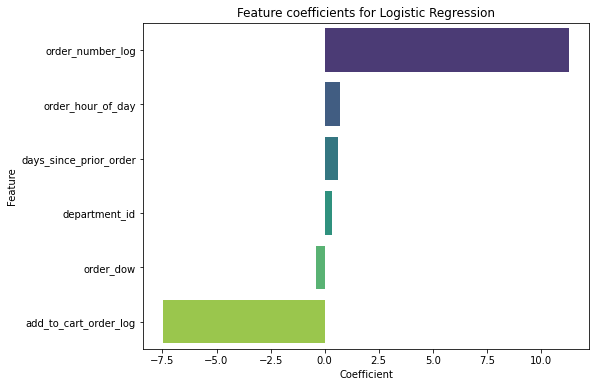

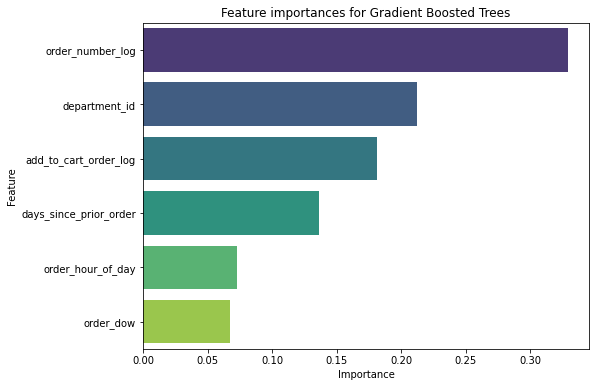

In [0]:
# Logistic Regression coefficients
lr_coefficients = best_lr_model.stages[-1].coefficients[0:len(input_features)]
lr_feature_df = pd.DataFrame({"feature": feature_names, "coefficient": lr_coefficients})
lr_feature_df = lr_feature_df.sort_values(by="coefficient", ascending=False)

# Gradient Boosted Trees feature importances
gbt_importances = best_gbt_model.stages[-1].featureImportances.toArray()
gbt_feature_df = pd.DataFrame(list(zip(feature_names, gbt_importances)), columns=["feature", "importance"])
gbt_feature_df = gbt_feature_df.sort_values(by="importance", ascending=False)

# Display all features for Logistic Regression
print("Important features for Logistic Regression:")
print(lr_feature_df)

# Display all features for Gradient Boosted Trees
print("\nImportant features for Gradient Boosted Trees:")
print(gbt_feature_df)

# Plotting Logistic Regression coefficients
plt.figure(figsize=(8, 6))
sns.barplot(data=lr_feature_df, x="coefficient", y="feature", palette="viridis")
plt.title("Feature coefficients for Logistic Regression")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

# Plotting Gradient Boosted Trees feature importances
plt.figure(figsize=(8, 6))
sns.barplot(data=gbt_feature_df, x="importance", y="feature", palette="viridis")
plt.title("Feature importances for Gradient Boosted Trees")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

- **Logistic Regression**:

The most important feature is "order_number_log" with a coefficient of 11.300174. This suggests that as the logarithm of the order number increases, it has a significant positive impact on the likelihood of reorder.
Other important features include "order_hour_of_day", "days_since_prior_order", and "department_id" with coefficients of 0.723723, 0.619604, and 0.352384, respectively. These features also contribute positively to the likelihood of reorder.
The "order_dow" (day of the week) feature has a negative coefficient of -0.384487, indicating that certain days of the week might have a slightly negative impact on the likelihood of reorder.
The "add_to_cart_order_log" feature has a coefficient of -7.462705, suggesting that as the logarithm of the add-to-cart order increases, it has a strong negative impact on the likelihood of reorder. 

-----

- **Gradient Boosted Trees**:

Similar to Logistic Regression, the "order_number_log" feature is also the most important feature for Gradient Boosted Trees with an importance value of 0.329163.
The "department_id" and "add_to_cart_order_log" features also play important roles in determining reorder likelihood, with importance values of 0.212325 and 0.181470, respectively.
The "days_since_prior_order" and "order_hour_of_day" features have relatively lower importance values of 0.136543 and 0.072755, respectively.
The "order_dow" feature has an importance value of 0.067743, indicating its relatively lower impact compared to other features.

#####Feature selection experiment

In [0]:
# Define the number of features to select
num_features_to_select = [2, 3, 4, 5]

# Iterate over the number of features to select
for num_features in num_features_to_select:
    # Select the top N important features from the Gradient Boosted Trees model
    selected_features = gbt_feature_df.nlargest(num_features, "importance")["feature"].tolist()
    
    # Create a new VectorAssembler using the selected features
    selected_vector_assembler = VectorAssembler(inputCols=selected_features, outputCol="selected_features")
    
    # Update the pipeline to include both VectorAssemblers and the normalizer
    selected_lr_pipeline = Pipeline(stages=[assembler, selected_vector_assembler, normalizer, lr])
    selected_gbt_pipeline = Pipeline(stages=[assembler, selected_vector_assembler, normalizer, gbt])
    
    # Update the normalizer to use the "selected_features" column
    normalizer.setInputCol("selected_features")
    
    # Train the models using the selected features
    selected_lr_model = selected_lr_pipeline.fit(training_balanced)
    selected_gbt_model = selected_gbt_pipeline.fit(training_balanced)
    
    # Evaluate the model using the selected features
    selected_lr_predictions = selected_lr_model.transform(test_balanced)
    selected_gbt_predictions = selected_gbt_model.transform(test_balanced)
    
    selected_evaluator = BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol='reordered', metricName='areaUnderROC')
    
    selected_lr_auc = selected_evaluator.evaluate(selected_lr_predictions)
    selected_gbt_auc = selected_evaluator.evaluate(selected_gbt_predictions)
    
    print(f"AUC using {num_features} selected features for Logistic Regression: {selected_lr_auc:.3f}")
    print(f"AUC using {num_features} selected features for Gradient Boosted Trees: {selected_gbt_auc:.3f}")
    print()

AUC using 2 selected features for Logistic Regression: 0.620
AUC using 2 selected features for Gradient Boosted Trees: 0.656

AUC using 3 selected features for Logistic Regression: 0.692
AUC using 3 selected features for Gradient Boosted Trees: 0.712

AUC using 4 selected features for Logistic Regression: 0.696
AUC using 4 selected features for Gradient Boosted Trees: 0.714

AUC using 5 selected features for Logistic Regression: 0.708
AUC using 5 selected features for Gradient Boosted Trees: 0.717



I have performed the feature selection and model evaluation using two machine learning algorithms: Logistic Regression (LR) and Gradient Boosted Trees (GBT). I have a list of different numbers of features to select, defined by the variable num_features_to_select. This process allows us to compare the performance of LR and GBT models with different numbers of selected features and determine the impact of feature selection on the models' predictive accuracy. The printed AUC scores provide insights into the models' performance using various feature subsets, aiding in the analysis and decision-making process. 

As a result of predictive modeling, the best model is Gradient Boosting with the AUC score of 72.150 and these features 'department_id', 'order_number_log', 'add_to_cart_order_log', 'order_hour_of_day', 'days_since_prior_order', 'order_dow'.

#####Hypothesis testing using ChiSquare

In [0]:
# Select the columns of interest
selected_columns = ['department_id', 'order_number_log', 'add_to_cart_order_log', 'order_hour_of_day',
                    'days_since_prior_order', 'order_dow', 'reordered']
df_selected = df_cleaned.select(selected_columns)

# Conduct hypothesis testing for each independent variable
for column in selected_columns[:-1]:  # Exclude the dependent variable 'reordered'
    # Prepare data for ChiSquareTest
    data = df_selected.select(column, 'reordered').rdd.map(lambda row: (row[0], float(row[1])))

    # Convert data to the required format for ChiSquareTest
    labeled_data = spark.createDataFrame(data, [column, 'reordered'])
    vector_col = column + "_vector"
    assembler = VectorAssembler(inputCols=[column], outputCol=vector_col)
    labeled_data = assembler.transform(labeled_data)

    # Apply ChiSqSelector to select features
    selector = ChiSqSelector(numTopFeatures=1, featuresCol=vector_col, outputCol="selected_features",
                             labelCol="reordered")
    selector_model = selector.fit(labeled_data)
    result = selector_model.transform(labeled_data)

    # Perform the Chi-square test
    chi_sq_test = ChiSquareTest.test(result, "selected_features", "reordered")

    # Print the result
    print(f"\nHypothesis testing for {column}")
    print(f"p-value: {chi_sq_test.pValues[0]}")
    print(f"Degrees of freedom: {chi_sq_test.degreesOfFreedom[0]}")
    print("Summary of test:")
    chi_sq_test.show(truncate=False)


Hypothesis testing for department_id
p-value: Column<'pValues[0]'>
Degrees of freedom: Column<'degreesOfFreedom[0]'>
Summary of test:
+-------+----------------+-------------------+
|pValues|degreesOfFreedom|statistics         |
+-------+----------------+-------------------+
|[0.0]  |[19]            |[84179.78424644221]|
+-------+----------------+-------------------+


Hypothesis testing for order_number_log
p-value: Column<'pValues[0]'>
Degrees of freedom: Column<'degreesOfFreedom[0]'>
Summary of test:
+-------+----------------+-------------------+
|pValues|degreesOfFreedom|statistics         |
+-------+----------------+-------------------+
|[0.0]  |[98]            |[200117.5381761258]|
+-------+----------------+-------------------+


Hypothesis testing for add_to_cart_order_log
p-value: Column<'pValues[0]'>
Degrees of freedom: Column<'degreesOfFreedom[0]'>
Summary of test:
+-------+----------------+-------------------+
|pValues|degreesOfFreedom|statistics         |
+-------+---------

Since the p-values are less than the significance level (typically 0.05), I can reject the null hypotheses for all the variables. This means that there is evidence to suggest that each of these variables has a statistically significant association with the probability of a customer making a reorder.